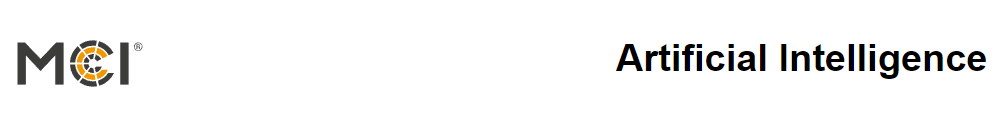

---

# 01 a Linear Regression

-----
## 1. Data Science, AI und ML

Data Science is a wide field in computer science. Parts of it is strongly connected to artificial intelligence (AI). As most of AI research is in weak AI, which is also strongly linked to machine learning, this notebook trys to link the three somehow.

In a typical process in Data Science we has the following steps:
 - Get & describe problem
 - Aquire data
 - Process data
 - Analyze data
 - Develop models
 - Visualize results
 - Deploy in product

Within this process AI is often linked to every step except the first and last one. In many cases the methods that are used within the AI steps are ML based. This notebook tries to explain the process along a given example.

### 1.1. The Problem & Data Aquisition

In medicine and sports force is a highly relevent thing to measure (Problem: We need good sensors for the measurement | Get & describe problem). Let's assume a new sensor was developed to measure the force along an axis. The developed sensor and it's electronics relates the force $F$ to a voltage $U$. In an experiment (Acquire Data) weights have been applied along the axis onto the sensor and the output voltage of the sensor was measured. To do the next step (Process Data) in the process we would need to load the data to be able to process. To simplyfy thing we randomly create our data with given functions in python. To do so, we have to import several libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 120 # we do this to get bigger plots

As a next step we create the data, that normaly comes from a given experiment (Aquire data).

In [3]:
np.random.seed(42) # we do this to be able to create always the same data, so we use a given seed
F = 5 * np.random.rand(100, 1) # This numpy array represents the forces we applied to the sensor
U = 1 + 0.5 * F + 0.1 * np.random.randn(100, 1) # This numpy array represents the voltages we measured with the sensor


Most of the people like to have visual information about the given data. Seeing the data as a table or a definition (as given above) is usually less intuitive to understand. Therefore, we use a scatter plot to visualize the given data.

Text(0, 0.5, 'U / V')

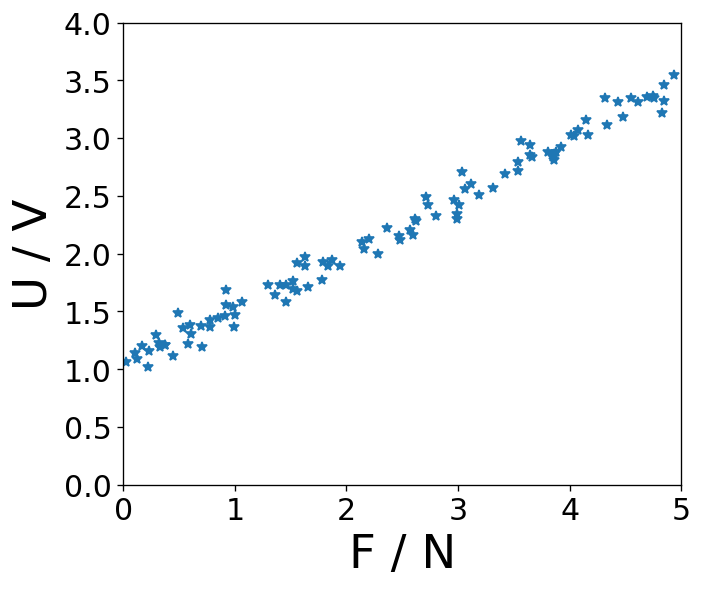

In [4]:
plt.figure(figsize=(6, 5))
plt.plot(F,U, '*')
plt.axis([0, 5, 0, 4])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('F / N',fontsize=28)
plt.ylabel('U / V',fontsize=28)

### 1.2. Process and Analyze Data

The data was aquired. Now it is time to do the next step, which would be to process the given data to be able to analyze it. We would like to find the linear relation between the force $F$ and the voltage $U$. To do so, we need a linear function, with adjustable parameter to fit the function to tge given data. The linear function we want to use is given here as:

$U=p_0 + F \cdot p_1$

$p_0$...can be seen as an offset value for the voltage $U$. Therefore it has the unit $V$

$p_1$...can be seen as an linear factor for the force $F$. Therefore it has the unit $\frac{V}{N}$



#### TASK: Manual Fit
In a first step we can try to fit the data manually. To do so, set values for the $p_0$ and $p_1$ to values that fit the data best (according to an estimation of yours). Feel free to put your own code in the cell below to get something like shown in the following image:

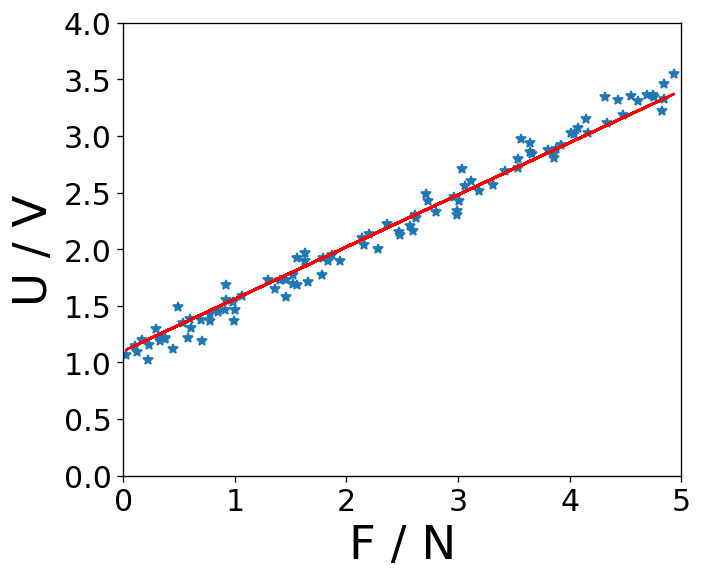

In [5]:
# your code goes here

If you could solve the given task, congrtulations! Below there is a possible solution for you to evaluate.

Text(0, 0.5, 'U / V')

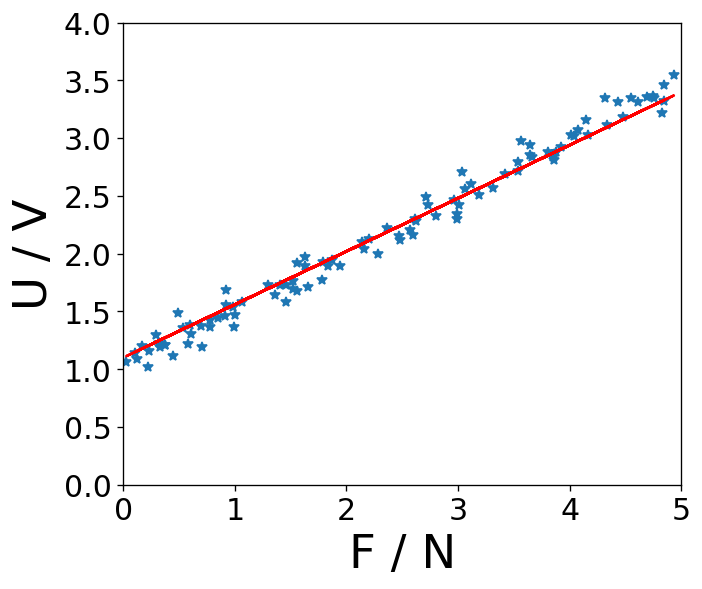

In [6]:
p0=1.1
p1=0.46
U_manually_estimated=p0+p1*F
plt.figure(figsize=(6, 5))
plt.plot(F,U, '*')
plt.plot(F,U_manually_estimated, "r-")
plt.axis([0, 5, 0, 4])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('F / N',fontsize=28)
plt.ylabel('U / V',fontsize=28)

With the given solutions for $p_0$ and $p_1$ a solution clould be found, but we do not know if it is the optimal one. There might be parameter sets the outperform the given solution. For that reason we have to find some sort of performance criterion that tells us how well the solution is performing. With such performance criterion we are able to compare solutions and program an algorithm, that finds the optimal solution. In data science and also in machine learning several function are available to determine such a performance criterion. The most common one in the given problem would be the mean squared error. The basic idea is to compare the real measured value with the estimation of the fit based on:


$MSE=\frac{1}{n}\sum_{i=1}^n (y_i -\hat{y}_i)^2$


$MSE$...as the mean squared error

$n$...as the number of measurements/estimations

$i$...as the index of the measurements/estimations

$y$...as the measurement value

$\hat{y}$...as the estimation value

In [7]:
MSE=np.sum(np.power(U-U_manually_estimated,2))/len(U)
print(MSE)

0.010181201614616928


Now we got the mean squared error (MSE) of our function based on all measurments. If we now find an algorithm that computes the MSE of a whole set of parameter, we can compare them and choose the one parameter set that is the best.

#### TASK: Find the best set of parameter

Let $p_0$ and $p_1$ range around the values you have chosen in the last task and compute the MSE over them. Find the one parameter set that is performing best within the given ranges.

In [8]:
# your code here

If you could solve the given task, congrtulations! Below there is a possible solution for you to evaluate.

optimal p1 = [0.49]
optimal p0 = [1.02]
optimal MSE = [0.00807883]


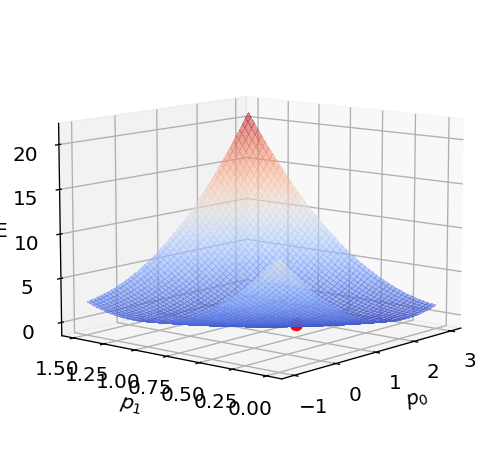

<Figure size 2400x1200 with 0 Axes>

In [9]:
from matplotlib import cm

p0=np.arange(-1,3,0.01)
p1=np.arange(0,1.5,0.01)
X_plot,Y_plot=np.meshgrid(p0,p1)
Z_plot=np.zeros(X_plot.shape)

for q in range(len(p0)):
    for w in range(len(p1)):
        U_manually_estimated=p0[q]+p1[w]*F
        Z_plot[w,q]=np.sum(np.power(U-U_manually_estimated,2))/len(U)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X_plot, Y_plot, Z_plot, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)
ax.view_init(elev=10, azim=220)

#print(np.min(Z_plot))
indices=np.where(np.min(Z_plot)==Z_plot)
#print(np.where(np.min(Z_plot)==Z_plot))
print("optimal p1 =",p1[indices[0]])
print("optimal p0 =",p0[indices[1]])
print("optimal MSE =",Z_plot[indices[0],indices[1]])

ax.scatter(p0[indices[1]], p1[indices[0]], Z_plot[indices[0],indices[1]], color='red', s=50)
plt.figure(figsize=(20, 10))

ax.set_ylabel('$p_1$',fontsize=12)
ax.set_xlabel('$p_0$',fontsize=12)
ax.set_zlabel('MSE',fontsize=12)

ax.tick_params(direction='out', labelsize=12)

The major problem with the given algorithm is, that it requires human input in terms of parameter initialization and definition of their resolution. This leads to very inefficient usage of computational power. I.e. the cell above ahs calsulatet 200 time 600 mean squared errors. Imagine the load if we have to have a better resolution (e.g. instead of a resolution of 0.01 we use a resolution of 0.001). The number of calculations would increase drastically.

## Gradient Descent Method

To solve the problem Augustin-Louis Cauchy introduced the gradient decent (and also ascent) method in 1847. The method can be explained quite simple. If there is a differentiable function, we can use the gradient of the function to determine the direction for the next adaption of the parameter. Depending of something that is called learining rate in ML we can define how far the steps go. If we do this repetitively we can get to a point where the gradient in all parameter directions becomes zero. At this point we found the local minimum.

FYI: The gradient ascent method works similar, although the determination of the direction for the next parameter adaption goes in opposite direction. This way it is possible to find maxima of the given funtion.

As we have done above, we will now do the explaination in detail on an example. The example we have used above is adequate for the explaination, therefor we will rely on it once more. Lets assume, we randomly initialize our parameter for the gradient decent method.

In [10]:
np.random.seed(42) # we do this to be able to create always the same data, so we use a given seed
p0=2*np.random.rand(1)
p1=6*np.random.rand(1)

In our next step we need to define a learing rate.

In [11]:
learning_rate=0.001

Now, it is time to define some functions, that we can use form the gradient decent algorithm. Remember, The initialization was only the first step. Now we have to start the loop interatively to find the optimal parameter set. Within the loop, we start with calculating the estimation based on our current parameter set, therefore we need a function that has the current parameter set and the data as input. The output of the function has to be the estimation.

In [12]:
def output_estimation(p0,p1,xdata):
    return p0+p1*xdata

Within the loop, the next step would be to calculate the mean suqared error for the specific estimation, done by the function above. This step is not mandatory to do, but for understanding the gradient descent algorithm it is quite handy.

In [13]:
def mean_squared_error(output_estimated,output_real):
    return np.sum(np.power(output_real-output_estimated,2))/len(output_real)

After we have calculated the mean squared error, we can calculate the gradient and adapt the parameter accordingly. The function that does that is given below:

In [86]:
def update_parameter(xdata,output_estimated,output_real,p0,p1,learning_rate):
    dp0=(np.sum(output_estimated-output_real))*2/len(output_real)
    dp1=(np.dot((output_estimated-output_real).transpose(),xdata))*2/len(output_real)
    p0_new=p0-learning_rate*dp0
    p1_new=p1-learning_rate*dp1
    return p0_new, p1_new.item()

Now we can combine the given function into a gradient descent function

In [91]:
def our_own_gradient_descent(xdata,output_real,iter_num,p0,p1,learning_rate):
    num_iterations=int(iter_num)

    p0_array=np.zeros(num_iterations)
    p1_array=np.zeros(num_iterations)
    MSE=np.zeros(num_iterations)
    
    p0_array[0]=p0[0]
    p1_array[0]=p1[0]

    print("Initial Values for p0, p1: ",p0[0],p1[0])

    for each_iter in range(num_iterations-1):
        output_estimated=output_estimation(p0_array[each_iter],p1_array[each_iter],xdata)
        MSE[each_iter]=mean_squared_error(output_estimated,output_real)
        p0_array[each_iter+1],p1_array[each_iter+1]=update_parameter(xdata,output_estimated,output_real,p0_array[each_iter],p1_array[each_iter],learning_rate)

    output_estimated=output_estimation(p0_array[-1],p1_array[-1],xdata)
    MSE[-1]=mean_squared_error(output_estimated,output_real)

    print("Final Estimate of p0, p1: ",p0_array[-1],p1_array[-1],"with a MSE of:", MSE[-1])
    return p0_array,p1_array,MSE


Now we can try to apply the gradient descent algorithm on our example.

In [92]:
number_of_iterations=10000
p0_array,p1_array,MSE=our_own_gradient_descent(F,U,number_of_iterations,p0,p1,learning_rate)

Initial Values for p0, p1:  0.749080237694725 5.704285838459497
Final Estimate of p0, p1:  1.0117034258256261 0.4938955686592892 with a MSE of: 0.008093222435788737


Below you can see how the parameter $p_0$ and $p_1$ are optimized from iteration to iteration

Below you can see how the parameter $p_0$ and $p_1$ are optimized from iteration to iteration

Text(0, 0.5, 'p0 & p1')

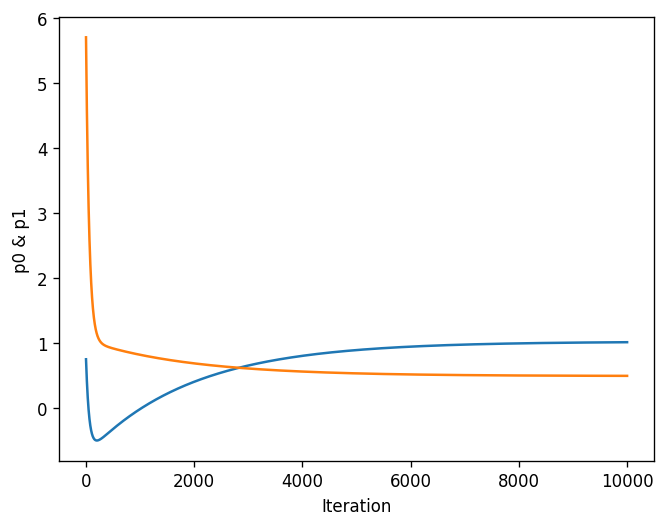

In [93]:
plt.plot(range(number_of_iterations),p0_array)
plt.xlabel("Iteration")
plt.ylabel("p0")

plt.plot(range(number_of_iterations),p1_array)
plt.xlabel("Iteration")
plt.ylabel("p0 & p1")

Below this cell you can see how the MSE is changing from iteration to iteration

Text(0, 0.5, 'MSE')

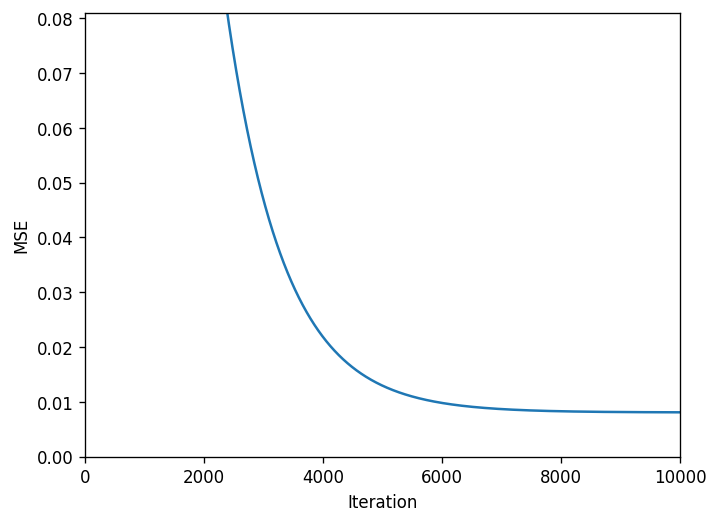

In [94]:
plt.plot(range(number_of_iterations),MSE)
plt.axis([0, number_of_iterations, 0, 10*MSE[-1]])
plt.xlabel("Iteration")
plt.ylabel("MSE")

In a comparison between the manual fit and the optimization fit, we can see, that the optimizeation fit is better.

1.0117034258256261
0.4938955686592892


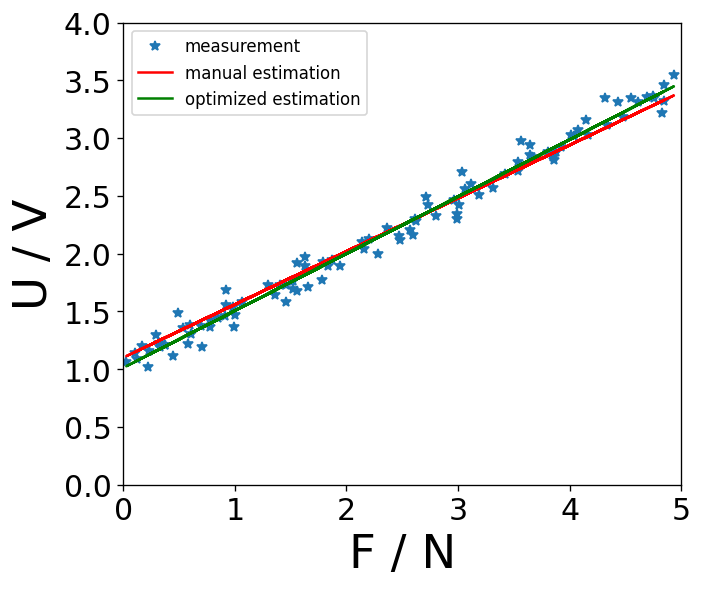

In [95]:
# manual fit

p0=1.1
p1=0.46
U_manually_estimated=p0+p1*F
plt.figure(figsize=(6, 5))
plt.plot(F,U, '*')
plt.plot(F,U_manually_estimated, "r-")
plt.axis([0, 5, 0, 4])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('F / N',fontsize=28)
plt.ylabel('U / V',fontsize=28)


#optimized fit

p0=p0_array[-1]
p1=p1_array[-1]
print(p0)# 1.0117034258256261 with LR of 0.001
print(p1)# 0.4938955686592892 with LR of 0.001
U_optimal_estimated=p0+p1*F
plt.plot(F,U_optimal_estimated, "g-")
plt.legend(['measurement','manual estimation','optimized estimation'])

#### TASK: Optimize Learning Rate
Adapt the learing rate so the model converges faster.Plot several MSE plots to see how far you can increase the learning rate to get similar results, but reach the final parameter in less iterations.